In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
rfb=pd.read_csv('1YRFb.csv')[3:-1]
rfb=rfb.set_axis(rfb.iloc[0],axis=1)[1:]
rfb=rfb.reset_index(drop=True)
rfb['Interest rate']=rfb['Interest rate'].astype(float)
rfb.columns.name=None
rfb.set_index('Date',inplace=True)
rfb=rfb/100
rfb.index=pd.to_datetime(rfb.index,format='%Y-%m-%d')
sp=pd.read_csv('SP100Returns.csv')
temp=sp.groupby('PERMNO').count().sort_values(by='date')
temp=temp[temp['date']==360]
permno_pool=temp.index.tolist()   
sp=sp[sp['PERMNO'].isin(permno_pool)] 
sp['date']=pd.to_datetime(sp['date'],format='%Y%m%d')
mkt_ret=sp[:360]['sprtrn']
mkt_ret.index=sp[:360]['date']

## a return


#### i)

In [14]:
mkt_arim_ret=mkt_ret.mean()
mkt_geo_ret=(mkt_ret+1).prod()**(1/len(mkt_ret))-1
print('Market arithmetic return:',mkt_arim_ret)
print('Market geometric return:',mkt_geo_ret)

Market arithmetic return: 0.007666766666666667
Market geometric return: 0.0067766632816785854


#### ii)

In [15]:
individual_arim_ret=sp.groupby('PERMNO')['RET'].mean()
individual_geo_ret=sp.groupby('PERMNO')['RET'].apply(lambda x: (x+1).prod()**(1/len(x))-1)
print('individual arithmetic return:',individual_arim_ret)
print('\n')
print('individual geometric return:',individual_geo_ret)
print('\n')
print('individual arithmetic return:',individual_arim_ret.mean())

individual arithmetic return: PERMNO
10104    0.023069
10107    0.020032
11308    0.009789
11850    0.007331
12052    0.016388
           ...   
70519    0.011833
75510    0.023786
76076    0.022244
87055    0.014528
92655    0.021621
Name: RET, Length: 67, dtype: float64


individual geometric return: PERMNO
10104    0.016685
10107    0.016277
11308    0.008164
11850    0.005904
12052    0.013905
           ...   
70519    0.004929
75510    0.015927
76076    0.016637
87055    0.011717
92655    0.017810
Name: RET, Length: 67, dtype: float64


individual arithmetic return: 0.01315474274461028


In [41]:
sp

,PERMNO,date,TICKER,COMNAM,PRC,RET,sprtrn
0,10104,1991-01-31,ORCL,ORACLE SYSTEMS CORP,9.00000,0.142857,0.041518
1,10104,1991-02-28,ORCL,ORACLE SYSTEMS CORP,9.00000,0.000000,0.067281
2,10104,1991-03-28,ORCL,ORACLE SYSTEMS CORP,9.00000,0.000000,0.022203
3,10104,1991-04-30,ORCL,ORACLE SYSTEMS CORP,9.25000,0.027778,0.000346
4,10104,1991-05-31,ORCL,ORACLE SYSTEMS CORP,7.50000,-0.189189,0.038577
...,...,...,...,...,...,...,...
24115,92655,2020-08-31,UNH,UNITEDHEALTH GROUP INC,312.54999,0.032268,0.070065
24116,92655,2020-09-30,UNH,UNITEDHEALTH GROUP INC,311.76999,0.001504,-0.039228
24117,92655,2020-10-30,UNH,UNITEDHEALTH GROUP INC,305.14001,-0.021266,-0.027666
24118,92655,2020-11-30,UNH,UNITEDHEALTH GROUP INC,336.34000,0.102248,0.107546


#### iii)

In [16]:
rfb_arim_ret=rfb['Interest rate'].mean()
rfb_geo_ret=(rfb['Interest rate']+1).prod()**(1/len(rfb['Interest rate']))-1
print('risk free rate average return:',rfb_arim_ret)
print('risk free rate geometric return:',rfb_geo_ret)

risk free rate average return: 0.028015555555555554
risk free rate geometric return: 0.027784225892123926


#### iv)

In [17]:
annual_mkt_geo_ret=(1+mkt_geo_ret)**12-1
print('annual market geometric return:',annual_mkt_geo_ret)

annual market geometric return: 0.08442040890040325


#### v)

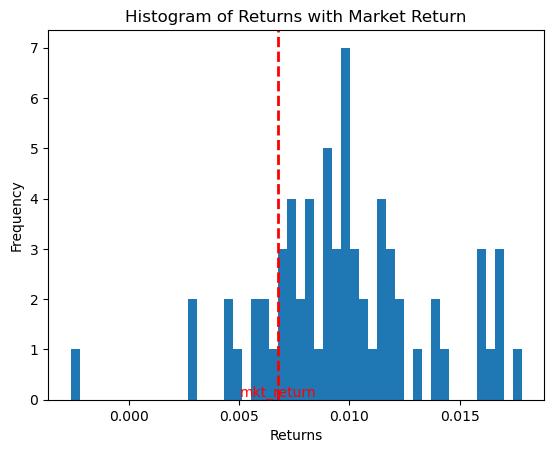

In [18]:
plt.hist(individual_geo_ret,bins=50)[2:]
plt.axvline(x=mkt_geo_ret, color='r', linestyle='--', linewidth=2)
plt.text(mkt_geo_ret, 0, 'mkt_return', color='r', ha='center', va='bottom')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Returns with Market Return')
plt.show()

In [19]:
sp_subset = sp[['PERMNO', 'date', 'RET']]
individual_ret = sp_subset.pivot(index='date', columns='PERMNO', values='RET')

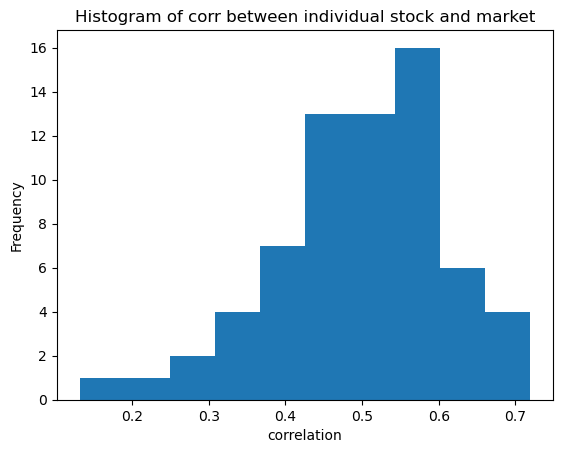

In [20]:
corr_stock_mkt=individual_ret.corrwith(mkt_ret).sort_values()
plt.hist(corr_stock_mkt)[2:]
plt.xlabel('correlation')
plt.ylabel('Frequency')
plt.title('Histogram of corr between individual stock and market')
plt.show()

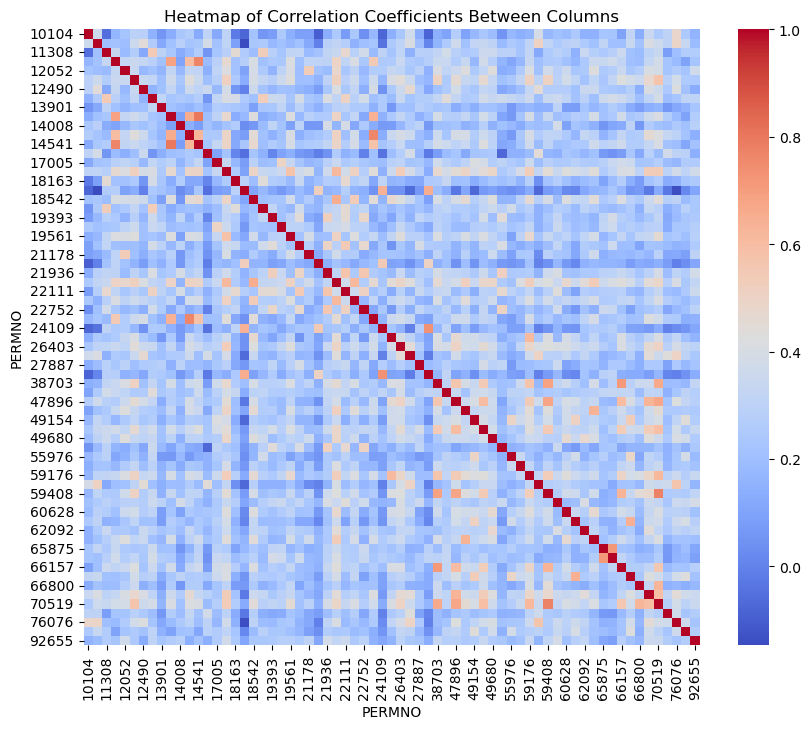

In [21]:
import seaborn as sns
corr = individual_ret.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Heatmap of Correlation Coefficients Between Columns")
plt.show()

1. Generally, these stocks have high correlation with the market since they are the components of SP500 and they are not randomly chosen.
2. Stock annual return is higher than the bond annual return.
3. The time span and the stock pool are not the same as that discussed in the class, and the latter showed an annual return of 11%, higher than the former.

## b

In [22]:
monthly_mkt_vol=np.std(mkt_ret)
monthly_individual_vol=sp.groupby('PERMNO')['RET'].std()
annual_mkt_vol=np.sqrt(12)*monthly_mkt_vol
annual_individual_vol=np.sqrt(12)*monthly_individual_vol
print('monthly market volatility:',monthly_mkt_vol)
print('\n')
print('monthly individual volatility:',monthly_individual_vol)
print('\n')
print('annual market volatility:',annual_mkt_vol)
print('\n')
print('annual individual volatility:',annual_individual_vol)

monthly market volatility: 0.041938996436702895


monthly individual volatility: PERMNO
10104    0.115647
10107    0.087934
11308    0.056805
11850    0.053417
12052    0.070848
           ...   
70519    0.114769
75510    0.128172
76076    0.106320
87055    0.074182
92655    0.085775
Name: RET, Length: 67, dtype: float64


annual market volatility: 0.14528094529363902


annual individual volatility: PERMNO
10104    0.400614
10107    0.304614
11308    0.196777
11850    0.185042
12052    0.245426
           ...   
70519    0.397573
75510    0.444002
76076    0.368303
87055    0.256975
92655    0.297134
Name: RET, Length: 67, dtype: float64


In [42]:
avg_corr_stock_mkt=np.mean(individual_ret.corrwith(mkt_ret))
avg_corr_between_stock=(corr.sum().sum()-len(corr))/(len(corr)*(len(corr)-1))
print('Average correlation between stock and market:',avg_corr_stock_mkt)
print('Average correlation between stock:',avg_corr_between_stock)

Average correlation between stock and market: 0.4956523955602912
Average correlation between stock: 0.2625770803396364


## c

In [50]:

monthly_rfb_rate=(rfb['Interest rate']+1)**(1/12)-1
rfb.index=mkt_ret.index
monthly_mkt_excess_ret=mkt_ret-monthly_rfb_rate
monthly_individual_excess_ret=individual_ret.subtract(monthly_rfb_rate,axis=0)
monthly_mkt_sharpe=monthly_mkt_excess_ret.mean()/mkt_ret.std()
monthly_individual_sharpe=monthly_individual_excess_ret.mean()/individual_ret.std()
annual_mkt_sharpe=np.sqrt(12)*monthly_mkt_sharpe
annual_individual_sharpe=np.sqrt(12)*monthly_individual_sharpe
print('monthly market sharpe:',monthly_mkt_sharpe)
print('\n')
print('monthly individual sharpe:',monthly_individual_sharpe)
print('\n')
print('annual market sharpe:',annual_mkt_sharpe)
print('\n')
print('annual individual sharpe:',annual_individual_sharpe)

monthly market sharpe: 0.12807521208387862


monthly individual sharpe: PERMNO
10104    0.179693
10107    0.201787
11308    0.132051
11850    0.094412
12052    0.199017
           ...   
70519    0.083164
75510    0.167728
76076    0.187694
87055    0.165001
92655    0.225391
Length: 67, dtype: float64


annual market sharpe: 0.44366554903887434


annual individual sharpe: PERMNO
10104    0.622476
10107    0.699011
11308    0.457439
11850    0.327053
12052    0.689415
           ...   
70519    0.288089
75510    0.581027
76076    0.650191
87055    0.571580
92655    0.780779
Length: 67, dtype: float64


In [54]:
sort_stock_sharpe=annual_individual_sharpe.sort_values()
permno=sort_stock_sharpe.index[-1]
ticker=sp[sp['PERMNO']==permno]['TICKER'].iloc[0]
print('the highest sharpe ratio stock:',ticker)

the highest sharpe ratio stock: DHR


## d

#### i)

In [51]:
final_money=(mkt_ret+1).prod()
print('investment worth at the end of 2020:',100*final_money)

investment worth at the end of 2020: 1137.4451769418406


#### ii)

In [57]:
rfb_year=rfb.resample('Y').first()
final_money_rf=(rfb_year['Interest rate']+1).prod()
print('investment worth at the end of 2020 with 1-year treasury bond:',100*final_money_rf)

investment worth at the end of 2020 with 1-year treasury bond: 234.11601437211073


#### iii)

In [94]:
mkt_horse=[]
rf_horse=[]
for i in range(25):
    mkt_horse.append((mkt_ret[i*12:(i+6)*12]+1).prod())
    rf_horse.append((rfb_year['Interest rate'][i:i+6]+1).prod())
print('Times the high-risk investor wins:',sum([1 for i in range(25) if mkt_horse[i]>rf_horse[i]]))

Times the high-risk investor wins: 15


#### iv)

In [30]:
total_return=(individual_ret+1).prod().sort_values()
print('investment worth of 100$ with the highest total return in 30 years:',100*total_return.iloc[-1])

investment worth of 100$ with the highest total return in 30 years: 57536.217985327574


#### v)

In [31]:
print('investment worth of 100$ with the 3rd lowest total return in 30 years:',100*total_return.iloc[2])

investment worth of 100$ with the 3rd lowest total return in 30 years: 297.9815083158226


#### vi)

In [32]:
max_return=individual_ret.max(axis=1)
print('investment worth of 100$ with maximum return every month in 30 years:',100*(max_return+1).prod())

investment worth of 100$ with maximum return every month in 30 years: 1.1806387126101154e+30


#### vii)

In [33]:
rebalance_ret=mkt_ret-0.25/100
print('investment worth of 100$ with rebalanced portfolio in 30 years:',100*(rebalance_ret+1).prod())

investment worth of 100$ with rebalanced portfolio in 30 years: 464.36646904701337


## 2

#### (a)

Spot rates for each maturity are:

1. $$y_{0,1} = \left(\frac{108}{103.335}\right)^1 - 1 = 4.514\%\$$
2. $$y_{0,2} = \left(\frac{110}{103.823}\right)^{\frac{1}{2}} - 1 = 2.932\%\$$
3.  $$y_{0,3} = \left(\frac{109}{102.273}\right)^{\frac{1}{3}} - 1 = 2.146\%\$$

#### b)

$$1 + F_{0,n,n+1} = \frac{(1 + y_{0,n+1})^{n+1}}{(1 + y_{0,n})^n}$$
1. $$F_{0,0,1} = y_{0,1}=4.514\%\$$
2. $$F_{0,1,2} =  \frac{(1 + y_{0,2})^{2}}{(1 + y_{0,1})^1}-1=1.373\%\$$
3. $$F_{0,2,3} =  \frac{(1 + y_{0,3})^{3}}{(1 + y_{0,2})^2}-1=0.593\%\$$


#### c)

$$
PV = \frac{C}{(1 + y_{0,1})} + \frac{C}{(1 + y_{0,2})^2} + \frac{C + FV}{(1 + y_{0,3})^3}
$$
$C=6,FV=100$,through calculation, $PV= 110.862$
$$PV = \frac{C}{(1 + YTM)} + \frac{C}{(1 +YTM)^2} + \frac{C + FV}{(1 + YTM)^3}$$
Take the number into the equation above, we get:
$$YTM=2.218\%\$$

In [36]:
from scipy.optimize import fsolve
def f(x):
    return 6/(1+x)+6/(1+x)**2+106/(1+x)**3-110.8620518
fsolve(f,0)

array([0.0221756])

## 3

#### a)

For a CARA (Constant Absolute Risk Aversion) investor with a risk aversion coefficient $ \gamma $, the utility of the asset with payoff $ \tilde{X} $ is:

$$
U = E[e^{-\gamma\tilde{X}}] = e^{-\gamma(\mu - \frac{1}{2}\gamma\sigma^2)}
$$

To make the investor indifferent, the expected utility of investing $ P $ in the asset and receiving the payoff $ \tilde{X} $ must be equal to the utility of no investment:

$$
e^{-\gamma(\mu - \frac{1}{2}\gamma\sigma^2)} = e^{-\gamma P}
$$

Solving for $ P $ gives us the price today that makes the investor indifferent:

$$
P = \mu - \frac{1}{2}\gamma\sigma^2
$$

#### b)

To make the investor indifferent, the expected utility of investing $ P $ in the asset and receiving the payoff $ \tilde{X} $ must be equal to the utility of investing $ P $ in a risk-free asset with return $ R_f $:

$$
e^{-\gamma(\mu-\frac{1}{2}\gamma\sigma^2)} = e^{-\gamma P(1 + r_f)}
$$

Solving for $ P $ gives us the price today that makes the investor indifferent:

$$
P = \frac{\mu - \frac{1}{2}\gamma\sigma^2}{1 + r_f}
$$


## 4

In [37]:
print(annual_mkt_geo_ret)
print(annual_mkt_vol)
print(rfb_geo_ret)
annual_rfb_vol=np.sqrt(12)*rfb['Interest rate'].std()
print(annual_rfb_vol)

0.08442040890040325
0.14528094529363902
0.027784225892123926
0.07575574726842076


#### a)

$$
E(U(mkt))=-e^{- \gamma(\mu_{mkt} - \frac{1}{2} \gamma\sigma_{mkt}^2)}$$
$$
E(U(rf))=-e^{- \gamma(\mu_{rf} - \frac{1}{2} \gamma\sigma_{rf}^2)}$$
$\mu_{mkt}=0.0844,\sigma_{mkt}=0.145,\mu_{rf}=0.0278,\sigma_{rf}=0.0758$<BR>
we get $$E(U(mkt)) < E(u(RF))$$

In [40]:
def E(gamma,miu,sigma):
    return -np.exp(gamma*(miu-0.5*gamma*sigma**2))
E(5/100000,annual_mkt_geo_ret,annual_mkt_vol)>E(5/100000,rfb_geo_ret,annual_rfb_vol)
print(E(5/100000,annual_mkt_geo_ret,annual_mkt_vol))
print(E(5/100000,rfb_geo_ret,annual_rfb_vol))

-1.0000042210029703
-1.0000013892050859


#### b)

take $$E(U(mkt))=E(U(rf))$$
by solving the equation, we get,$\gamma=737084.6$

In [39]:
2*(annual_mkt_geo_ret-rfb_geo_ret)/(annual_mkt_vol**2-annual_rfb_vol**2)

7.370846450806592